In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
oscar = pd.read_csv('oscar.csv')
oscar.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,year_film,year_ceremony,ceremony,category,name,film,winner,Number of wins,runtime
0,0,5,5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,False,3,94
1,1,60,90,1929,1930,3,CINEMATOGRAPHY,(Arthur Edeson),All Quiet on the Western Front,False,2,152
2,2,94,162,1931,1932,5,ACTRESS,Marie Dressler,Emma,False,1,120
3,3,128,236,1932,1933,6,DIRECTING,George Cukor,Little Women,False,3,115
4,4,146,266,1934,1935,7,ACTOR,Clark Gable,It Happened One Night,True,5,105


In [3]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      434 non-null    int64 
 1   Unnamed: 0.1    434 non-null    int64 
 2   Unnamed: 0.1.1  434 non-null    int64 
 3   year_film       434 non-null    int64 
 4   year_ceremony   434 non-null    int64 
 5   ceremony        434 non-null    int64 
 6   category        434 non-null    object
 7   name            434 non-null    object
 8   film            434 non-null    object
 9   winner          434 non-null    bool  
 10  Number of wins  434 non-null    int64 
 11  runtime         434 non-null    int64 
dtypes: bool(1), int64(8), object(3)
memory usage: 37.8+ KB


In [4]:
dataset = pd.read_csv('imdbTop250.csv')
dataset.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
0,1,1996,/title/tt0076759/,Star Wars: Episode IV - A New Hope,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1299781,322.74,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2529673,28.34,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.0,665213,16.50,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Drama, Mystery",8.5,77.0,1045626,23.34,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,53316,NaN,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN


Winners : 2
False    312
True     122
Name: winner, dtype: int64


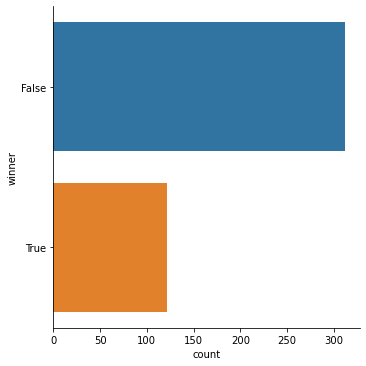

In [5]:
# Generations in the Dataset
print("Winners :", len(oscar["winner"].unique()))

# Pokemons in each Generation
print(oscar["winner"].value_counts())
sb.catplot(y = "winner", data = oscar, kind = "count")

In [6]:
rating = pd.DataFrame(dataset[["Rating"]])  # Response
win = pd.DataFrame(oscar["winner"])      # Predictor

In [7]:
# Train Set : 600 samples
win_train = pd.DataFrame(win[:600])
rating_train = pd.DataFrame(rating[:600])

# Test Set : 200 samples
win_test = pd.DataFrame(win[-200:])
rating_test = pd.DataFrame(rating[-200:])

# Check the sample sizes
print("Train Set :", rating_train.shape, win_train.shape)
print("Test Set  :", rating_test.shape, win_test.shape)

Train Set : (600, 1) (434, 1)
Test Set  : (200, 1) (200, 1)


In [8]:
type(rating_train["Rating"])

pandas.core.series.Series

In [9]:
rating_train["Rating"].value_counts()

8.0    68
8.3    61
8.1    58
8.2    49
7.8    45
7.9    41
7.7    35
8.5    30
7.6    28
7.3    27
7.5    26
8.4    20
7.4    18
8.6    16
7.2    15
8.7     9
6.8     7
6.7     6
8.9     6
9.0     6
7.1     6
8.8     5
9.3     3
6.9     3
7.0     3
9.2     3
6.5     2
6.4     1
5.5     1
6.6     1
6.1     1
Name: Rating, dtype: int64

In [10]:
win_train.describe()

,winner
count,434
unique,2
top,False
freq,312


<AxesSubplot:xlabel='Rating', ylabel='Count'>

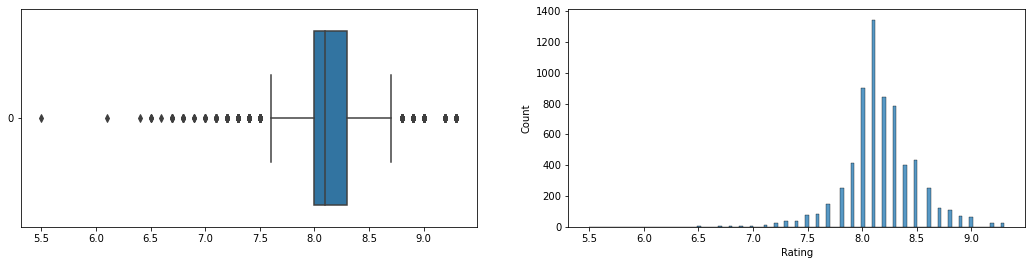

In [11]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = dataset['Rating'], orient = "h", ax = axes[0])
sb.histplot(data = dataset['Rating'], ax = axes[1])

In [12]:
for d in range(0, len(oscar)):
    if oscar['winner'].loc[d] == True:
        oscar['winner'].loc[d] = 'Win'
    else:
        oscar['winner'].loc[d] = 'No Win'
oscar

C:\Users\kyong\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,year_film,year_ceremony,ceremony,category,name,film,winner,Number of wins,runtime
0,0,5,5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,No Win,3,94
1,1,60,90,1929,1930,3,CINEMATOGRAPHY,(Arthur Edeson),All Quiet on the Western Front,No Win,2,152
2,2,94,162,1931,1932,5,ACTRESS,Marie Dressler,Emma,No Win,1,120
3,3,128,236,1932,1933,6,DIRECTING,George Cukor,Little Women,No Win,3,115
4,4,146,266,1934,1935,7,ACTOR,Clark Gable,It Happened One Night,Win,5,105
...,...,...,...,...,...,...,...,...,...,...,...,...
429,429,4798,10289,2019,2020,92,ANIMATED FEATURE FILM,"Sergio Pablos, Jinko Gotoh and Marisa Román",Klaus,No Win,0,96
430,430,4802,10295,2019,2020,92,CINEMATOGRAPHY,Roger Deakins,1917,Win,3,119
431,431,4803,10306,2019,2020,92,DIRECTING,Bong Joon Ho,Parasite,Win,4,132
432,432,4814,10317,2019,2020,92,FILM EDITING,Michael McCusker and Andrew Buckland,Ford v Ferrari,Win,2,152


In [14]:
new = dataset["Title"].str.split("(", n = 1, expand = True)
dataset["Title"]= new[0]
#Remove the last whitespace
dataset['Title'] = dataset['Title'].str.strip()

In [19]:
title = []
rating = []
win = []
k = 0
for os in range(0, len(oscar)):
    #print(oscar['film'][os])
    for sl in range(0, len(dataset)):
        if oscar['film'][os]==dataset['Title'][sl]:
            #print("match")
            k+=1
            title.append(dataset['Title'][sl])
            rating.append(dataset['Rating'][sl])
            win.append(oscar['winner'][os])
dict = {'Title':title, 'Rating':rating, 'winner':win}
df = pd.DataFrame(dict)
df

,Title,Rating,winner
0,Sunrise,8.1,No Win
1,Sunrise,8.1,No Win
2,Sunrise,8.1,No Win
3,Sunrise,8.1,No Win
4,Sunrise,8.1,No Win
...,...,...,...
4390,Ford v Ferrari,8.1,Win
4391,Ford v Ferrari,8.1,Win
4392,Avengers: Endgame,8.4,No Win
4393,Avengers: Endgame,8.4,No Win


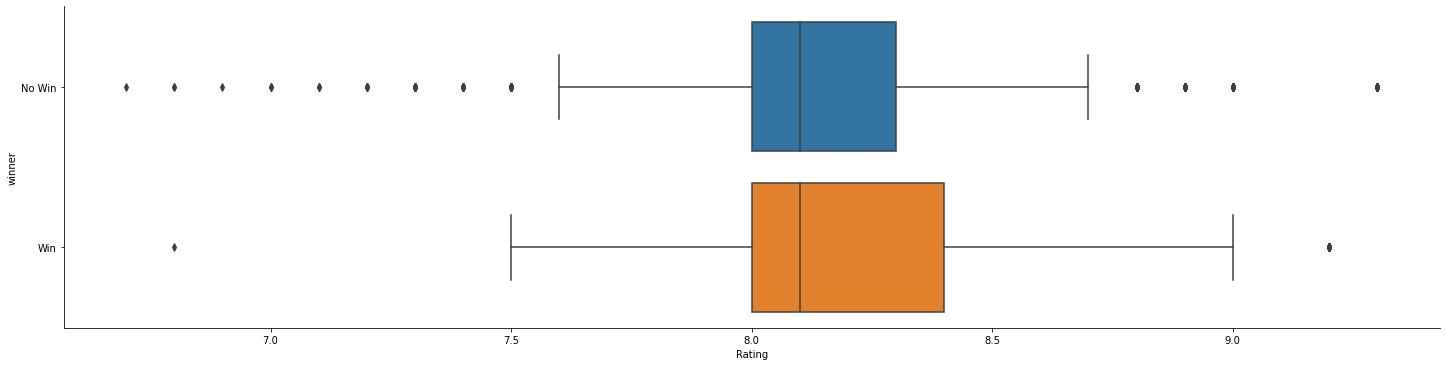

In [20]:
sb.catplot(x='Rating',y='winner',data=df,kind='box', orient="h",aspect=4)

In [21]:
df

,Title,Rating,winner
0,Sunrise,8.1,No Win
1,Sunrise,8.1,No Win
2,Sunrise,8.1,No Win
3,Sunrise,8.1,No Win
4,Sunrise,8.1,No Win
...,...,...,...
4390,Ford v Ferrari,8.1,Win
4391,Ford v Ferrari,8.1,Win
4392,Avengers: Endgame,8.4,No Win
4393,Avengers: Endgame,8.4,No Win
